In [121]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
import plotly.express as px

In [122]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = "c786432c95fd431cbdf8f6e4a4b8dcdc"
cis = "c78fb2927e58451fb0fa01d5c364b941"

auth_manager = SpotifyClientCredentials(client_id=cid, client_secret=cis)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Use just the Artist ID
artist_id = "1mYsTxnqsietFxj1OgoGbG"

artist = sp.artist(artist_id)
print(artist["name"])
print("Followers:", artist["followers"]["total"])
print("Genres:", artist["genres"])

A.R. Rahman
Followers: 68286094
Genres: ['tamil pop', 'kollywood', 'sufi', 'bollywood', 'hindi pop', 'tamil dance', 'desi']


In [ ]:
name = "A. R. Rahman"
result = sp.search(q=name, type="artist", limit=1)
artist_id = result['artists']['items'][0]['id']

print("Artist ID:", artist_id)

# Get artist albums
results = sp.artist_albums(artist_id, album_type='album')
albums = results['items']

while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

# Print album names
for album in albums:
    print(album['name'])

Artist ID: 1mYsTxnqsietFxj1OgoGbG
Mass Hero Songs
A.R. Rahman & Mani Ratnam Hits
Kadhalikka Neramillai Ost
Kadhalikka Neramillai (DIALOGUES)
Thug Life (Tamil)
Ambient Music
Thug Life (Telugu)
Thug Life (Hindi)
Chhaava (Telugu) [Original Motion Picture Soundtrack]
Chhaava (Original Motion Picture Soundtrack)
Jodi (Original Motion Picture Soundtrack)
Raayan (Original Background Score)
Jeans (Original Background Score)
Randaka Randaka - A.R. Rahman & Harris Jayaraj
A. R. Rahman Hits Vol.1
Le Musk (Original Soundtrack)
Varalaru (Original Motion Picture Soundtrack)
Ponniyin Selvan (Original Score)
Sangamam (Original Soundtrack)
Mudhalvan (Original Soundtrack)
Iruvar (Original Soundtrack)
Indian (Original Soundtrack)
May Maadham (Original Motion Picture Soundtrack)
Sangamam (Karaoke)
Pippa (Original Motion Picture Soundtrack)
En Swasa Katre (Karaoke)
Sapnay (Original Motion Picture Soundtrack)
AR Rahman Rain Melodies
Thaalam (Original Motion Picture Soundtrack)
Nayakudu (Original Motion Pict

In [124]:
ARRahman_top_tracks = "spotify:artist:1mYsTxnqsietFxj1OgoGbG"
sp = spotipy.Spotify(auth_manager=auth_manager)

results = sp.artist_top_tracks(ARRahman_top_tracks, country='IN')

for track in results['tracks'][:10]:
    song_name = track['name']
    preview = track['preview_url']
    spotify_url = track['external_urls']['spotify']

    print(f"Song : {song_name}")
    if preview:
        print(f"Audio Preview : {preview}")
    print(f"Spotify URL : {spotify_url}\n")


Song : Tere Bina
Spotify URL : https://open.spotify.com/track/4FeczSomVWVyU4FW7xDeAI

Song : Agar Tum Saath Ho (From "Tamasha")
Spotify URL : https://open.spotify.com/track/7aYW9bfmULF9q2hwe2HtpU

Song : Raanjhanaa (From "Raanjhanaa")
Spotify URL : https://open.spotify.com/track/5OMUXgfXsSukZ0zxelpC3b

Song : Enna Sona
Spotify URL : https://open.spotify.com/track/6bdpj89aYEBjhpsenXAsmO

Song : Tum Tak (From "Raanjhanaa")
Spotify URL : https://open.spotify.com/track/1wnozUBSe7OMpmZiTPJC5j

Song : Muththa Mazhai (Reprise)
Spotify URL : https://open.spotify.com/track/0nrJ7jsUFR0pDHV6NvKJje

Song : Nee Singam Dhan
Spotify URL : https://open.spotify.com/track/0vua5LbAth2HzKqpbnVRZk

Song : Maahi Ve
Spotify URL : https://open.spotify.com/track/1sbW5E7w8tnqpYk0Frx8QG

Song : Jinguchaa (From "Thug Life") (Tamil)
Spotify URL : https://open.spotify.com/track/3hZg8oiTOWFZWaFudFi610

Song : Kun Faya Kun
Spotify URL : https://open.spotify.com/track/7F8RNvTQlvbeBLeenycvN6



In [125]:
# Search for a track by name
track_name = "Tere Bina"
results = sp.search(q=track_name, type="track", limit=1)

track_id = results['tracks']['items'][0]['id']
track_url = results['tracks']['items'][0]['external_urls']['spotify']

print("Track ID:", track_id)
print("Track URL:", track_url)

Track ID: 4FeczSomVWVyU4FW7xDeAI
Track URL: https://open.spotify.com/track/4FeczSomVWVyU4FW7xDeAI


In [126]:
track_id = "4FeczSomVWVyU4FW7xDeAI"

# Get track details
track_info = sp.track(track_id)



# Extract metadata
name = track_info['name']
album = track_info['album']['name']
artist = track_info['album']['artists'][0]['name']
release_date = track_info['album']['release_date']
length = track_info['duration_ms']
popularity = track_info['popularity']
Spotify_URL= track_info['external_urls']['spotify']



In [127]:
track =[name, album, artist, release_date, length, popularity,spotify_url]

In [128]:
df=pd.DataFrame (track).T.values.tolist()
df_final =pd.DataFrame(df, columns=['name', 'album', 'artist', 'release_Date',' length','popularity','spotify_url'])

In [129]:
df_final

,name,album,artist,release_Date,length,popularity,spotify_url
0,Tere Bina,Guru (Original Motion Picture Soundtrack),A.R. Rahman,2006-09-11,309640,80,https://open.spotify.com/track/7F8RNvTQlvbeBLe...


In [130]:
def getTrackIDs(user, playlist_id):
  track_ids = []
  album = sp.user_playlist(user, playlist_id)
  for item in album[ 'tracks']['items']:
    track = item[ 'track']
    track_ids.append (track['id'])
  return track_ids
  track_ids = getTrackIDs('spotify', "4FeczSomVWVyU4FW7xDeAI") 
  print(len(track_ids) )
  print (track_ids)

In [131]:
def getTrackIDs(user, playlist_id):
    track_ids = []
    album = sp.user_playlist(user, playlist_id)
    for item in album['tracks']['items']:
        track = item.get('track')
        if track and track.get('id'):
            track_ids.append(track['id'])
    return track_ids

#Give this playlist a listen: TELUGU MELODIES https://open.spotify.com/playlist/1omqR4qHb4SnSn61367Dch?si=LxXZSC-rQneguXDxtUI5jQ
# Call function correctly (outside!)
track_ids = getTrackIDs('spotify', "1omqR4qHb4SnSn61367Dch")
print(len(track_ids))
print(track_ids)

79
['1ixAWv7Y8ZJa32zdnRLZru', '16RigX2qPBrjju5ddZv1X6', '6sMTVcrg8EdL9tMcgyzYZh', '5JnXwEckWO0oFijOyTZDLf', '47hP2BJPCOMyYKT5WQ9evZ', '3j9DrRebdWK1jkpOw9FZUy', '5DN8dF1Q0K8G6pgCQjqVvF', '4swLsRDd6VI5BB1dej03L3', '4ZXsuOSu0vWtWMfmf1Gl3j', '7lSYoKmtmay3y4wMO6nLrj', '6obKaXHU2avqfLZFPjGm4K', '37LmFlPnpsBISJjNvqbUkT', '1m6R9gLcwA4E9ecWpo4qsY', '7mNQwVYgoB3mtjkjCKsbXM', '7El6rXuDiiMNreCDv5QKBD', '1C9SYGI40nNYh98gN87Fwr', '0wOu2i0WEwVl6zvUvOx6L6', '5nVFeACm96rucybpDAjfK5', '4kEd65XC9mEFTiscE6f6N9', '2oMVPX0asvUfRfap0iEmXv', '5icJ3lEvL73C07mJd4s8nu', '499rs8fMaltXk2BOlq9P0m', '2QYaPFQkOcUZYfylyJHiH6', '5dG3KI5rIUwiUQNNr3Y1to', '4hgbMZJ5JXOIxZtHhfrL1n', '1jz0PUb4rChtZUk4Itn1Co', '4Cz7b7uNlUreVMdClhDMtO', '6ygDZq4V1SWkAqXHMmQvz2', '0WM0NpFIZg6JhgneUyU5tl', '3edo3q894PZFxsbDqqsm6r', '1Tf3RCP9Gs6CghGHeM3I7h', '4sbR8sUkAe6tJTooAQauEe', '57zEYntUat0ofbFpoicN26', '6CtrkXMad3ZtmYiOtKfI0t', '4EjO3ELtQkbOBox5adad6a', '7A3HdpivKNGgTW2Bo3udV8', '54XqmpDTyCx2rdKOic5zon', '2mUvMLSJmlo5iI8PMLRRJz', '1YA5XoT

In [132]:
def getPlaylistFeatures(id):
  track_info = sp.track(id)

  #Track Info
  name = track_info['name']
  album = track_info[ 'album']['name']
  artist = track_info[ 'album']['artists'][0][ 'name']
  release_date = track_info['album']['release_date']
  length = track_info[ 'duration_ms']
  popularity = track_info['popularity']
  Spotify_URL= track_info['external_urls']['spotify']
  track_data =[name, album, artist, release_date, length, popularity,Spotify_URL]

  return track_data

In [133]:
track_list = []
for i in range(len(track_ids)):
    time.sleep(.3)
    track_data = getPlaylistFeatures(track_ids[i])
    track_list.append(track_data)

naija_playlist = pd.DataFrame(track_list, columns=['name','album','artist','release_date','length','popularity','spotify_url'])
naija_playlist.to_csv("india_playlist.csv", index=False)
naija_playlist.head()

,name,album,artist,release_date,length,popularity,spotify_url
0,Challa Gaali Thakuthunna,Yevade Subramanyam,Radhan,2015-02-21,245498,50,https://open.spotify.com/track/1ixAWv7Y8ZJa32z...
1,Ninnu Chuse Anandamlo,Gang Leader (Original Motion Picture Soundtrack),Anirudh Ravichander,2019-09-05,293000,56,https://open.spotify.com/track/16RigX2qPBrjju5...
2,Naaloni Nuvvu Neeloni Nenu,Needi Naadhi Oke Katha,Suresh Bobbili,2021-03-07,206604,0,https://open.spotify.com/track/6sMTVcrg8EdL9tM...
3,Inkem Inkem Inkem Kaavaale,Geetha Govindam,Gopi Sundar,2018,266715,64,https://open.spotify.com/track/5JnXwEckWO0oFij...
4,Pillaa Raa,RX 100 (Original Motion Picture Soundtrack),Chaitan Bharadwaj,2018-06-29,237580,0,https://open.spotify.com/track/47hP2BJPCOMyYKT...


In [134]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('ggplot')
sns.set_palette("viridis")



In [135]:
# Cell 2: Load and explore the data
df = pd.read_csv('india_playlist.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (79, 7)

First few rows:


,name,album,artist,release_date,length,popularity,spotify_url
0,Challa Gaali Thakuthunna,Yevade Subramanyam,Radhan,2015-02-21,245498,50,https://open.spotify.com/track/1ixAWv7Y8ZJa32z...
1,Ninnu Chuse Anandamlo,Gang Leader (Original Motion Picture Soundtrack),Anirudh Ravichander,2019-09-05,293000,56,https://open.spotify.com/track/16RigX2qPBrjju5...
2,Naaloni Nuvvu Neeloni Nenu,Needi Naadhi Oke Katha,Suresh Bobbili,2021-03-07,206604,0,https://open.spotify.com/track/6sMTVcrg8EdL9tM...
3,Inkem Inkem Inkem Kaavaale,Geetha Govindam,Gopi Sundar,2018,266715,64,https://open.spotify.com/track/5JnXwEckWO0oFij...
4,Pillaa Raa,RX 100 (Original Motion Picture Soundtrack),Chaitan Bharadwaj,2018-06-29,237580,0,https://open.spotify.com/track/47hP2BJPCOMyYKT...


In [136]:
# Cell 3: Data cleaning and preprocessing
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Remove rows with missing values
df_clean = df.dropna().reset_index(drop=True)

# Convert length from milliseconds to minutes
df_clean['length_min'] = df_clean['length'] / 60000

# Extract year from release_date
df_clean['year'] = pd.to_datetime(df_clean['release_date'], errors='coerce').dt.year

# Clean up artist names (some have extra spaces)
df_clean['artist'] = df_clean['artist'].str.strip()

print(f"\nOriginal dataset: {df.shape[0]} rows")
print(f"Cleaned dataset: {df_clean.shape[0]} rows")

Missing values in each column:
name            6
album           6
artist          0
release_date    0
length          0
popularity      0
spotify_url     0
dtype: int64

Original dataset: 79 rows
Cleaned dataset: 73 rows


In [137]:
# Cell 4: Basic statistics
print("Basic Statistics:")
print("================")
print(f"Total songs: {len(df_clean)}")
print(f"Total artists: {df_clean['artist'].nunique()}")
print(f"Total albums: {df_clean['album'].nunique()}")
print(f"Time range: {int(df_clean['year'].min())} - {int(df_clean['year'].max())}")
print(f"Average song length: {df_clean['length_min'].mean():.2f} minutes")
print(f"Average popularity: {df_clean['popularity'].mean():.2f}/100")

Basic Statistics:
Total songs: 73
Total artists: 28
Total albums: 60
Time range: 1999 - 2024
Average song length: 4.51 minutes
Average popularity: 45.99/100


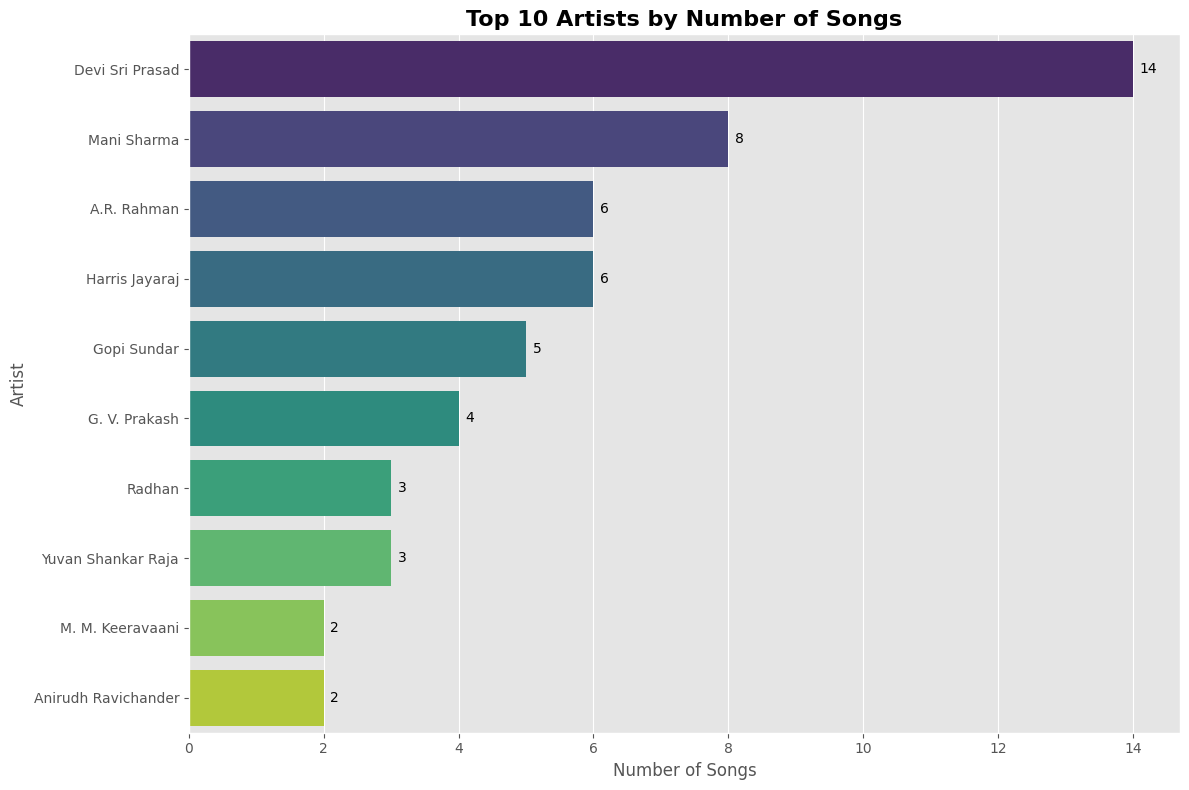

In [138]:
# Cell 5: Top 10 artists by number of songs
plt.figure(figsize=(12, 8))
top_artists = df_clean['artist'].value_counts().head(10)
ax = sns.barplot(x=top_artists.values, y=top_artists.index, palette="viridis")
plt.title('Top 10 Artists by Number of Songs', fontsize=16, fontweight='bold')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')

# Add value labels on bars
for i, v in enumerate(top_artists.values):
    ax.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

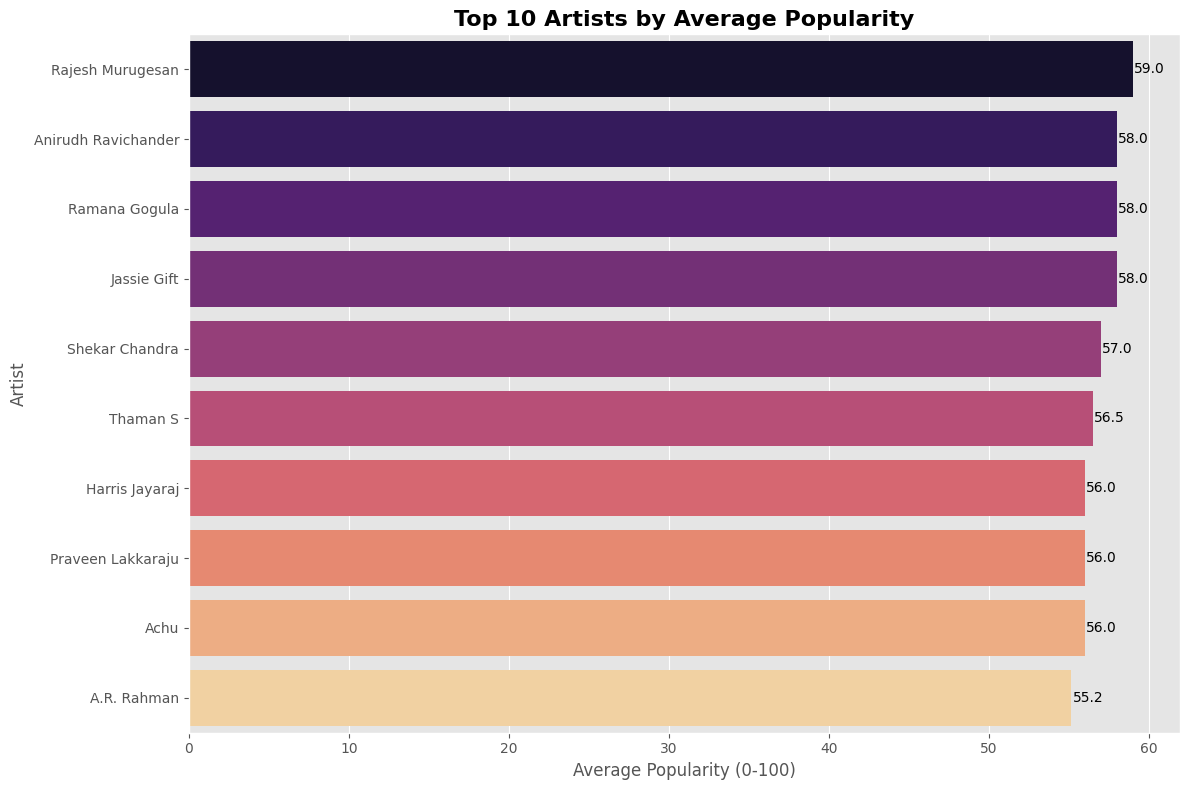

In [139]:
# Cell 6: Top 10 artists by average popularity
plt.figure(figsize=(12, 8))
artist_popularity = df_clean.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
ax = sns.barplot(x=artist_popularity.values, y=artist_popularity.index, palette="magma")
plt.title('Top 10 Artists by Average Popularity', fontsize=16, fontweight='bold')
plt.xlabel('Average Popularity (0-100)')
plt.ylabel('Artist')

# Add value labels on bars
for i, v in enumerate(artist_popularity.values):
    ax.text(v + 0.1, i, f"{v:.1f}", color='black', va='center')

plt.tight_layout()
plt.show()

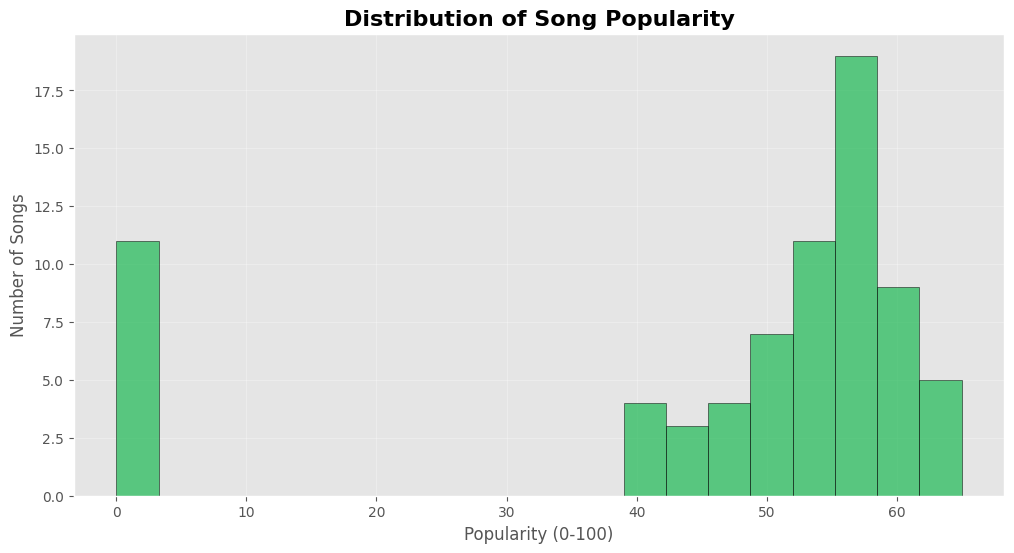

In [140]:
# Cell 7: Popularity distribution
plt.figure(figsize=(12, 6))
plt.hist(df_clean['popularity'], bins=20, color='#1DB954', alpha=0.7, edgecolor='black')
plt.title('Distribution of Song Popularity', fontsize=16, fontweight='bold')
plt.xlabel('Popularity (0-100)')
plt.ylabel('Number of Songs')
plt.grid(True, alpha=0.3)
plt.show()

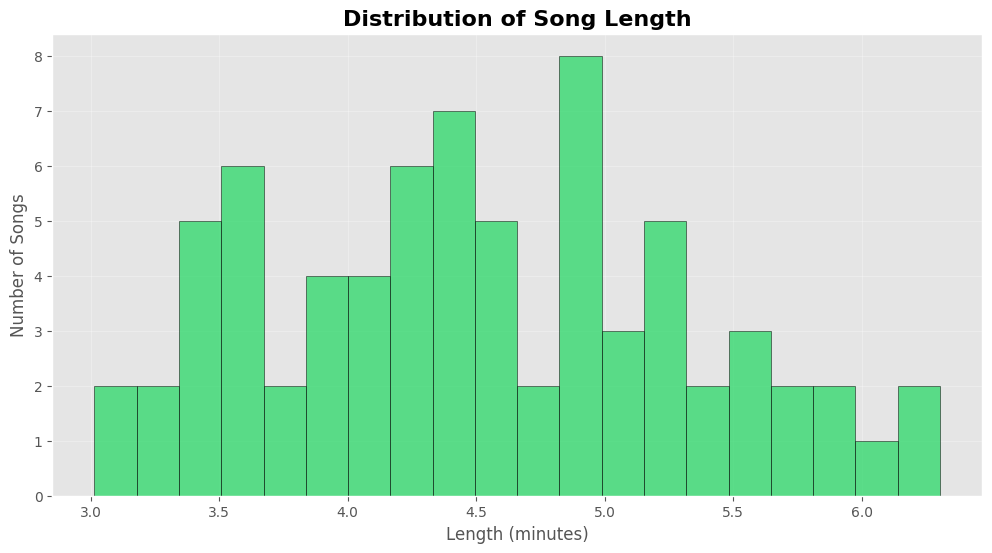

In [141]:
# Cell 8: Song length distribution
plt.figure(figsize=(12, 6))
plt.hist(df_clean['length_min'], bins=20, color='#1ED760', alpha=0.7, edgecolor='black')
plt.title('Distribution of Song Length', fontsize=16, fontweight='bold')
plt.xlabel('Length (minutes)')
plt.ylabel('Number of Songs')
plt.grid(True, alpha=0.3)
plt.show()

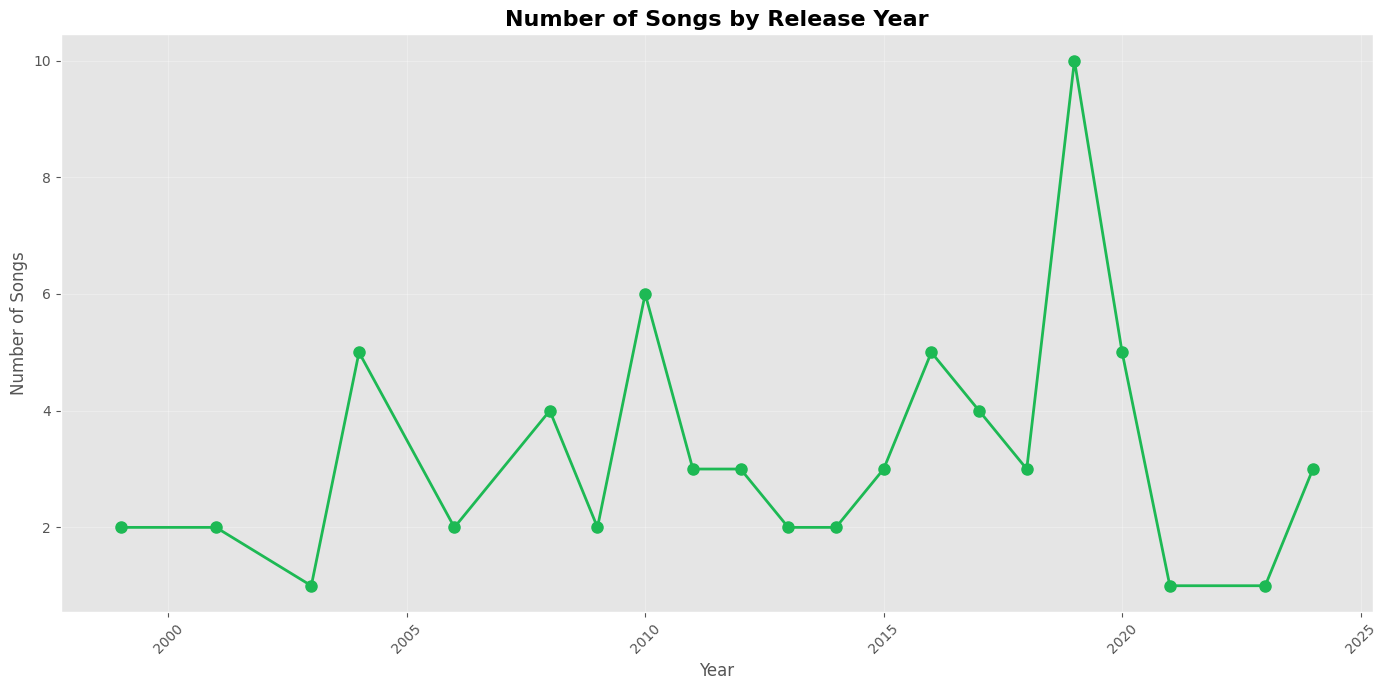

In [142]:
# Cell 9: Songs by year
plt.figure(figsize=(14, 7))
year_counts = df_clean['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8, color='#1DB954')
plt.title('Number of Songs by Release Year', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

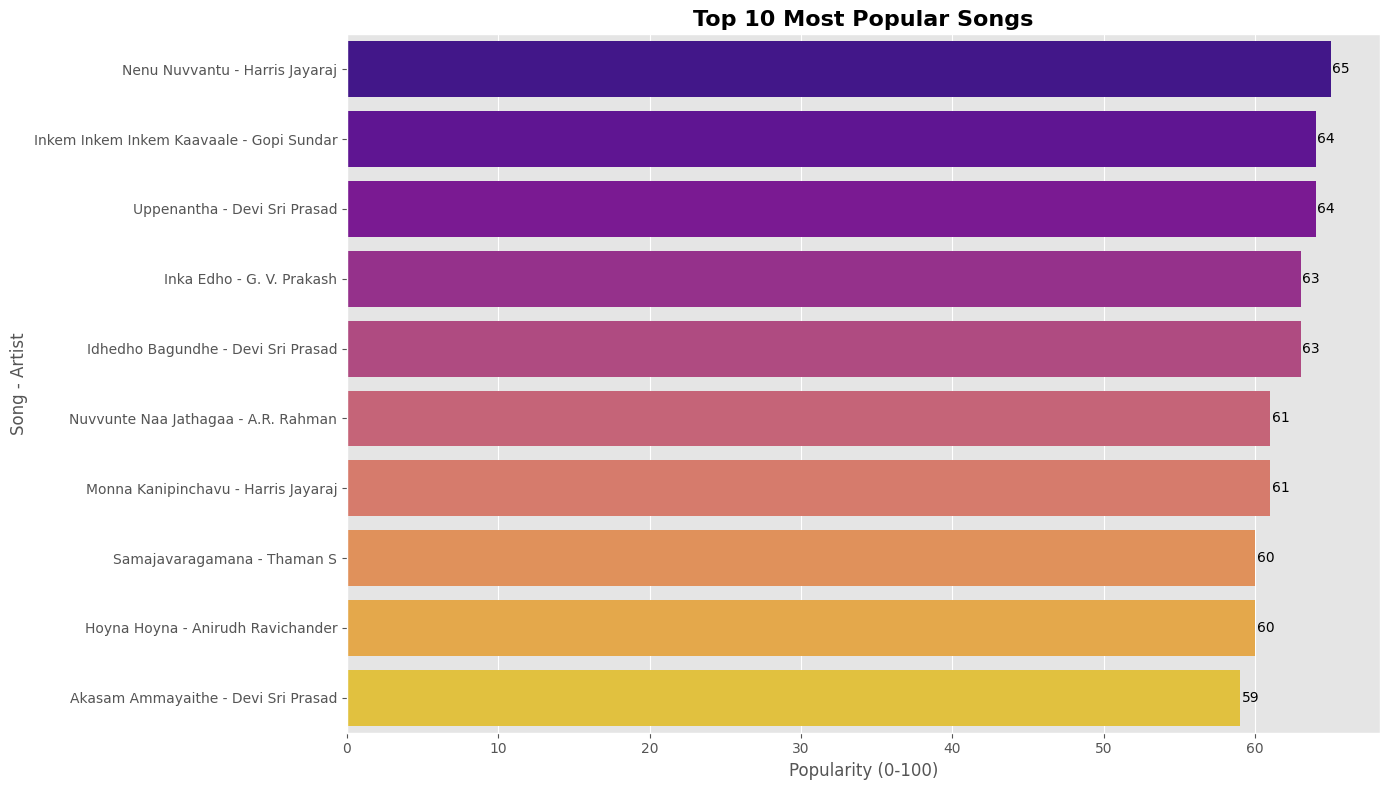

In [143]:
# Cell 10: Top 10 most popular songs
plt.figure(figsize=(14, 8))
top_songs = df_clean.nlargest(10, 'popularity')[['name', 'artist', 'popularity']]
top_songs['song_artist'] = top_songs['name'] + ' - ' + top_songs['artist']

ax = sns.barplot(x='popularity', y='song_artist', data=top_songs, palette="plasma")
plt.title('Top 10 Most Popular Songs', fontsize=16, fontweight='bold')
plt.xlabel('Popularity (0-100)')
plt.ylabel('Song - Artist')

# Add value labels on bars
for i, v in enumerate(top_songs['popularity']):
    ax.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

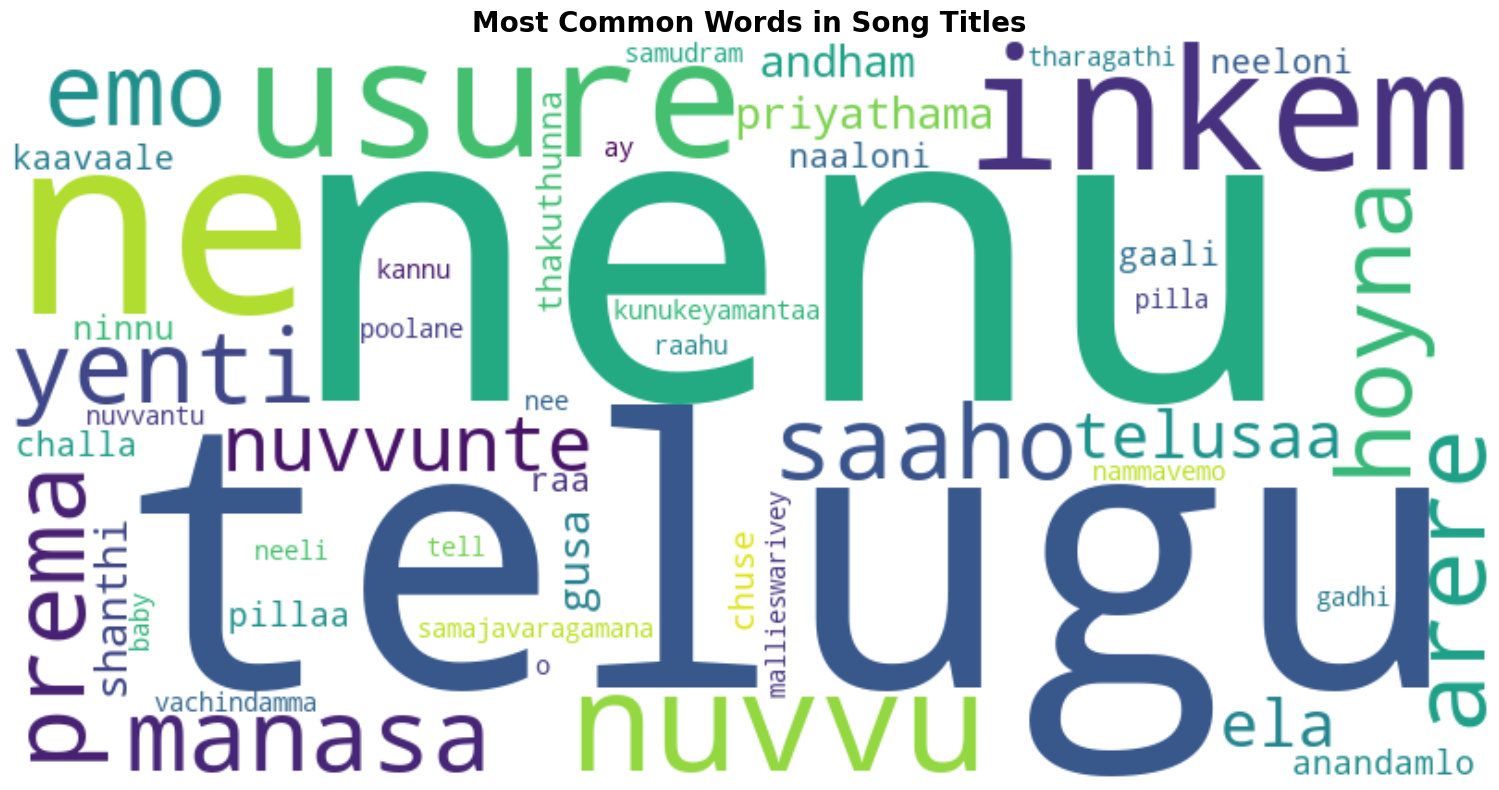

In [145]:
# Cell 12: Word cloud of song titles
# Combine all song titles
all_titles = ' '.join(df_clean['name'].str.lower())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='viridis',
                      max_words=50).generate(all_titles)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Song Titles', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

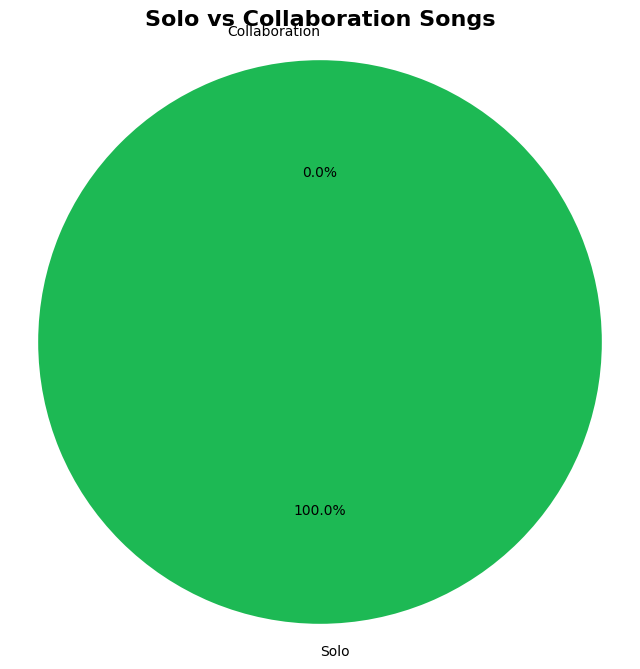

In [146]:
# Cell 13: Artist network analysis (collaborations)
# Extract primary artists (first artist mentioned)
df_clean['primary_artist'] = df_clean['artist'].apply(lambda x: x.split(',')[0].strip() if ',' in x else x)

# Count collaborations
collab_counts = df_clean['artist'].str.contains(',').value_counts()
labels = ['Solo', 'Collaboration']
sizes = [collab_counts.get(False, 0), collab_counts.get(True, 0)]
colors = ['#1DB954', '#1ED760']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Solo vs Collaboration Songs', fontsize=16, fontweight='bold')
plt.show()

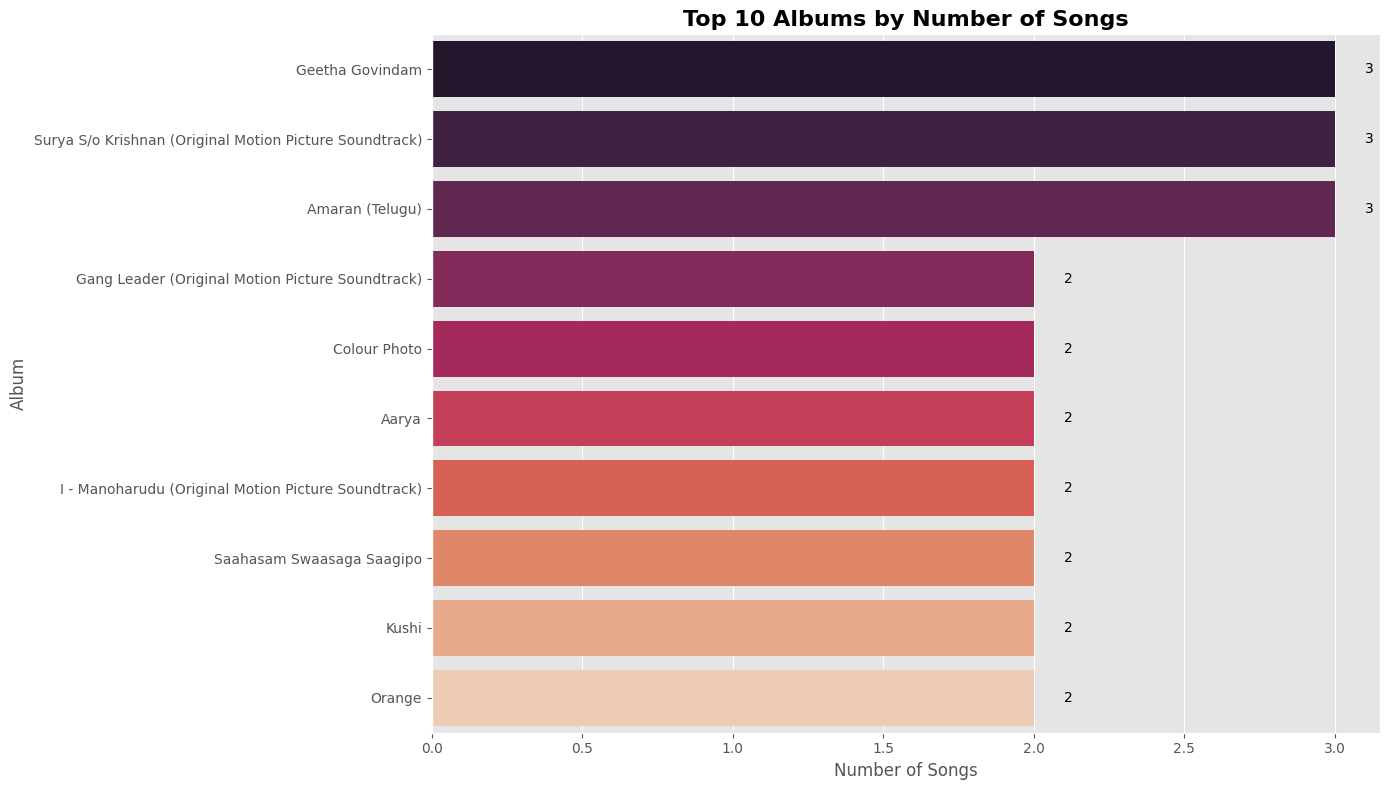

In [147]:
# Cell 15: Top albums by number of songs
plt.figure(figsize=(14, 8))
top_albums = df_clean['album'].value_counts().head(10)
ax = sns.barplot(x=top_albums.values, y=top_albums.index, palette="rocket")
plt.title('Top 10 Albums by Number of Songs', fontsize=16, fontweight='bold')
plt.xlabel('Number of Songs')
plt.ylabel('Album')

# Add value labels on bars
for i, v in enumerate(top_albums.values):
    ax.text(v + 0.1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

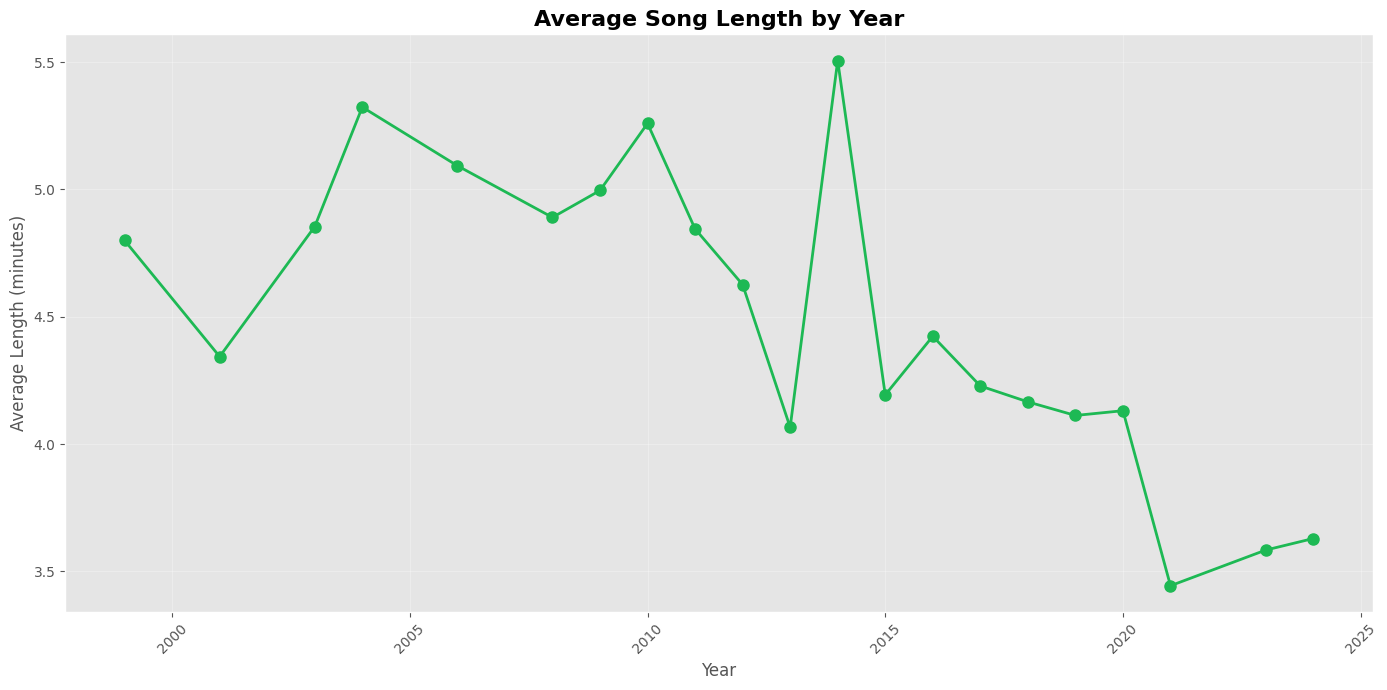

In [149]:
# Cell 17: Song length analysis by year
plt.figure(figsize=(14, 7))
yearly_avg_length = df_clean.groupby('year')['length_min'].mean()

plt.plot(yearly_avg_length.index, yearly_avg_length.values, 
         marker='o', linewidth=2, markersize=8, color='#1DB954')
plt.title('Average Song Length by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Length (minutes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

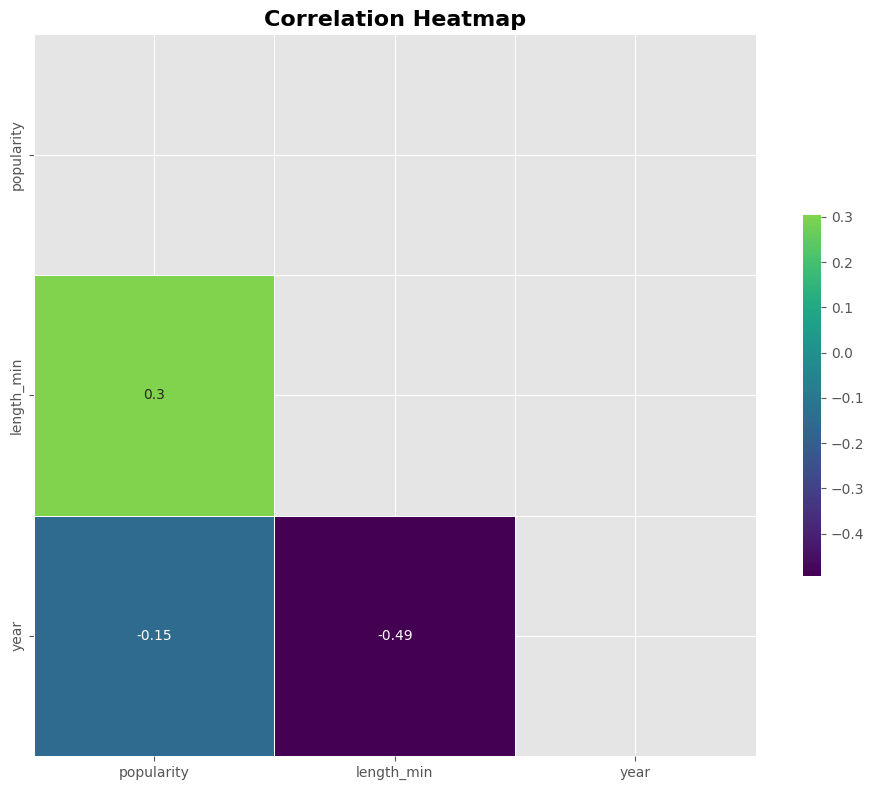

In [151]:
# Cell 19: Correlation heatmap (for numerical features)
# Select numerical columns
numerical_df = df_clean[['popularity', 'length_min', 'year']]

plt.figure(figsize=(10, 8))
corr_matrix = numerical_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='viridis', 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [152]:
# Cell 20: Summary statistics
print("SUMMARY STATISTICS")
print("==================")
print(f"Total songs analyzed: {len(df_clean)}")
print(f"Time period: {int(df_clean['year'].min())} - {int(df_clean['year'].max())}")
print(f"Most common artist: {df_clean['artist'].value_counts().index[0]} ({df_clean['artist'].value_counts().iloc[0]} songs)")
print(f"Most popular song: {df_clean.nlargest(1, 'popularity')['name'].iloc[0]} ({df_clean.nlargest(1, 'popularity')['popularity'].iloc[0]}/100)")
print(f"Longest song: {df_clean.nlargest(1, 'length_min')['name'].iloc[0]} ({df_clean.nlargest(1, 'length_min')['length_min'].iloc[0]:.2f} minutes)")
print(f"Shortest song: {df_clean.nsmallest(1, 'length_min')['name'].iloc[0]} ({df_clean.nsmallest(1, 'length_min')['length_min'].iloc[0]:.2f} minutes)")

SUMMARY STATISTICS
Total songs analyzed: 73
Time period: 1999 - 2024
Most common artist: Devi Sri Prasad (14 songs)
Most popular song: Nenu Nuvvantu (65/100)
Longest song: Emantaro (6.30 minutes)
Shortest song: Aaduvari (3.01 minutes)
